**IMPORT NECESSARY LIBRARIES**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# **HEALTHCARE ANALYSIS**

Healthcare is a critical domain where data plays pivotal role in understanding patient demographics,medical conditions, and the effectiveness of healthcare services. In this EDA project, we will delve into a synthetic healthcare dataset that mimics real-world data.
This dataset encompasses various aspects of patient information, admission details, medical conditions, and healthcare services, making it a comprehensive dataset for analysis.

## *Our project helps hospitals address these challenges by providing actionable insights from patient data. It enables hospitals to:*

1. Analyze Diseases: Identify prevalent medical conditions, like asthma, to streamline resource allocation and manage inventory effectively.

2. Understand Patient Demographics: Gain a clear understanding of patient ratios, such as gender distribution and blood type prevalence, for better service planning.

3. Collaborate Strategically: Determine the leading insurance providers, like Cigna, and commonly prescribed medications, like penicillin, to form effective partnerships with third-party companies.

By leveraging these insights, hospitals can improve patient care, optimize operations, and enhance decision-making processes.


**LOADING THE DATASET**

In [ ]:
#read_csv functions helps to load the csv file data and create a dataframe in pandas
healthcare = pd.read_csv('/content/healthcare_dataset_modified.csv')
#the below code displays the dataframe transpose for the 1st five rows
healthcare.head().T

,0,1,2,3,4
Name,Tiffany Ramirez,Ruben Burns,Chad Byrd,Antonio Frederick,Mrs. Brandy Flowers
Age,81,35,61,49,51
Unnamed: 2,NaN,NaN,NaN,NaN,NaN
Unnamed: 3,NaN,NaN,NaN,NaN,NaN
Unnamed: 4,NaN,NaN,NaN,NaN,NaN
Date of Admission,11/17/2022,6/1/2023,1/9/2019,5/2/2020,7/9/2021
Doctor,Patrick Parker,Diane Jackson,Paul Baker,Brian Chandler,Dustin Griffin
Hospital,Wallace-Hamilton,"Burke, Griffin and Cooper",Walton LLC,Garcia Ltd,"Jones, Brown and Murray"
Unnamed: 8,NaN,NaN,NaN,NaN,NaN
Billing Amount,37490.98336,47304.06485,36874.897,23303.32209,18086.34418


**DATASET BRIEF OVERVIEW**

In [ ]:
#summary of the DataFrame, including the index dtype and column dtypes, non-null values and memory usage
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Unnamed: 2          0 non-null      float64
 3   Unnamed: 3          0 non-null      float64
 4   Unnamed: 4          0 non-null      float64
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Unnamed: 8          0 non-null      float64
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Unnamed: 11         0 non-null      float64
 12  Discharge Date      10000 non-null  object 
 13  Unnamed: 13         0 non-null      float64
 14  Unnamed: 14         0 non-null      float64
 15  Gender              2335 non-null   object 
 16  Blood

In [ ]:
#computes summary of statistics pertaining to the DataFrame's numeric columns.
healthcare.describe()

,Age,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 8,Billing Amount,Room Number,Unnamed: 11,Unnamed: 13,Unnamed: 14
count,10000.000000,0.0,0.0,0.0,0.0,10000.000000,10000.000000,0.0,0.0,0.0
mean,51.452200,NaN,NaN,NaN,NaN,25516.806778,300.082000,NaN,NaN,NaN
std,19.588974,NaN,NaN,NaN,NaN,14067.292709,115.806027,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,1000.180837,101.000000,NaN,NaN,NaN
25%,35.000000,NaN,NaN,NaN,NaN,13506.523967,199.000000,NaN,NaN,NaN
50%,52.000000,NaN,NaN,NaN,NaN,25258.112565,299.000000,NaN,NaN,NaN
75%,68.000000,NaN,NaN,NaN,NaN,37733.913725,400.000000,NaN,NaN,NaN
max,85.000000,NaN,NaN,NaN,NaN,49995.902280,500.000000,NaN,NaN,NaN


We can understand from the above table that age range of patients is between 18 to 85. The min billing amount is 1000 and maximum billing amount is 49995.

In [ ]:
#computes summary of statistics pertaining to the DataFrame's categorical columns.
healthcare.describe(include = 'O')

,Name,Date of Admission,Doctor,Hospital,Discharge Date,Gender,Blood Type,Medical Condition,Insurance Provider,Admission Type,Medication,Test Results
count,10000,10000,10000,10000,10000,2335,2335,2335,2335,2335,2335,2335
unique,9378,1815,9416,8639,1834,2,8,8,5,4,7,3
top,Michael Johnson,4/12/2019,Michael Johnson,Smith PLC,11/28/2021,Female,O+,Hypertension,Cigna,Emergency,Penicillin,Positive
freq,7,15,7,19,14,1666,828,609,694,952,702,1219


In [ ]:
# return a tuple with the dimension of the dataframe
healthcare.shape

(10000, 22)

There are 10000 rows and 15 columns in this dataset.

**DATA CLEANING**

In [ ]:
#check for NULL values if any in each column
healthcare.isnull().sum()

,0
Name,0
Age,0
Unnamed: 2,10000
Unnamed: 3,10000
Unnamed: 4,10000
Date of Admission,0
Doctor,0
Hospital,0
Unnamed: 8,10000
Billing Amount,0


There are no null values in our healthcare dataset as the value for all the columns are zero.

In [ ]:
#check if there are duplicate records in the data
healthcare.duplicated().sum()

0

As the result is zero it means there are no duplicate records

In [ ]:
healthcare.head()

,Name,Age,Unnamed: 2,Unnamed: 3,Unnamed: 4,Date of Admission,Doctor,Hospital,Unnamed: 8,Billing Amount,...,Discharge Date,Unnamed: 13,Unnamed: 14,Gender,Blood Type,Medical Condition,Insurance Provider,Admission Type,Medication,Test Results
0,Tiffany Ramirez,81,NaN,NaN,NaN,11/17/2022,Patrick Parker,Wallace-Hamilton,NaN,37490.98336,...,12/1/2022,NaN,NaN,Female,AB+,Hypertension,Cigna,Elective,Penicillin,Positive
1,Ruben Burns,35,NaN,NaN,NaN,6/1/2023,Diane Jackson,"Burke, Griffin and Cooper",NaN,47304.06485,...,6/15/2023,NaN,NaN,Female,O+,Obesity,Cigna,Elective,Amoxicillin,Inconclusive
2,Chad Byrd,61,NaN,NaN,NaN,1/9/2019,Paul Baker,Walton LLC,NaN,36874.89700,...,2/8/2019,NaN,NaN,Female,O+,Asthma,Blue Cross,Emergency,Penicillin,Negative
3,Antonio Frederick,49,NaN,NaN,NaN,5/2/2020,Brian Chandler,Garcia Ltd,NaN,23303.32209,...,5/3/2020,NaN,NaN,Female,O+,Heart Disease,Aetna,Elective,Ibuprofen,Positive
4,Mrs. Brandy Flowers,51,NaN,NaN,NaN,7/9/2021,Dustin Griffin,"Jones, Brown and Murray",NaN,18086.34418,...,8/2/2021,NaN,NaN,Female,A-,Hypertension,Cigna,Emergency,Metformin,Negative


In [ ]:
# Date of Admission and Discharge Date have dtype as object let's format it to datetime
for date in ['Date of Admission','Discharge Date']:
    healthcare[date] = pd.to_datetime(healthcare[date])
#calculate the no: of days patients got admitted in hospital
healthcare['Days Hospitalized'] = (healthcare['Discharge Date'] - healthcare['Date of Admission']).dt.days
healthcare['Days Hospitalized'] = healthcare['Days Hospitalized'].astype(int)
healthcare['Days Hospitalized']

,Days Hospitalized
0,14
1,14
2,30
3,1
4,24
...,...
9995,4
9996,23
9997,14
9998,20


In [ ]:
#drop columns irrelevant to our analysis
healthcare = healthcare.drop(columns = ['Name','Date of Admission','Discharge Date','Room Number'])
healthcare.columns

Index(['Age', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Doctor', 'Hospital',
       'Unnamed: 8', 'Billing Amount', 'Unnamed: 11', 'Unnamed: 13',
       'Unnamed: 14', 'Gender', 'Blood Type', 'Medical Condition',
       'Insurance Provider', 'Admission Type', 'Medication', 'Test Results',
       'Days Hospitalized'],
      dtype='object')

**DATA EXPLORATION AND VISUALIZATION**

In [ ]:
#using for loop to find the distribution of data for categorical columns
for col in healthcare.columns:
    if healthcare[col].dtype == 'O' and col != 'Doctor' and col!= 'Hospital':
        print(healthcare[col].value_counts())
        print('--')

Gender
Female    1666
Male       669
Name: count, dtype: int64
--
Blood Type
O+     828
A+     824
B+     425
AB+    118
O-      67
A-      43
B-      25
AB-      5
Name: count, dtype: int64
--
Medical Condition
Hypertension      609
Asthma            488
Diabetes          326
Obesity           240
Arthritis         225
Heart Disease     223
Cancer            121
Kidney Disease    103
Name: count, dtype: int64
--
Insurance Provider
Cigna                694
Aetna                573
Blue Cross           472
UnitedHealth         362
Kaiser Permanente    234
Name: count, dtype: int64
--
Admission Type
Emergency    952
Elective     777
Newborn      362
Trauma       244
Name: count, dtype: int64
--
Medication
Penicillin      702
Metformin       493
Ibuprofen       332
Atorvastatin    255
Lisinopril      237
Amoxicillin     215
Omeprazole      101
Name: count, dtype: int64
--
Test Results
Positive        1219
Negative         868
Inconclusive     248
Name: count, dtype: int64
--


____________________________________________________________________________________________________


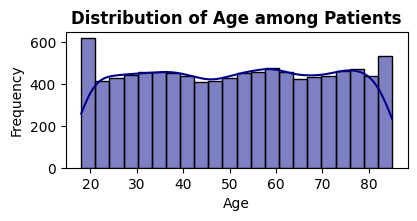

____________________________________________________________________________________________________


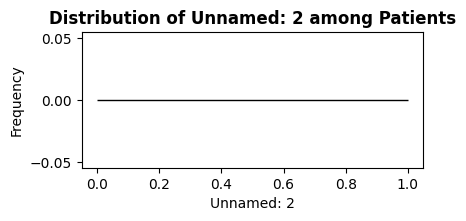

____________________________________________________________________________________________________


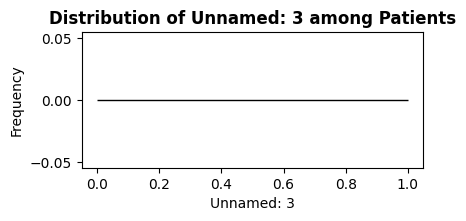

____________________________________________________________________________________________________


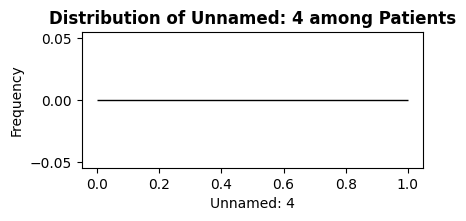

____________________________________________________________________________________________________


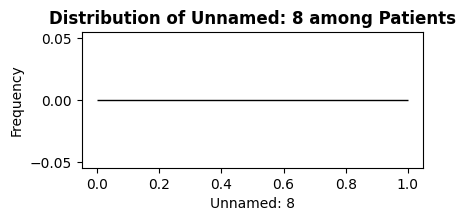

____________________________________________________________________________________________________


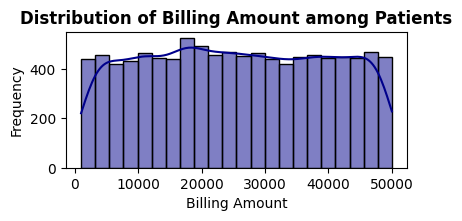

____________________________________________________________________________________________________


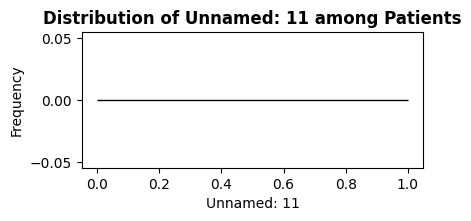

____________________________________________________________________________________________________


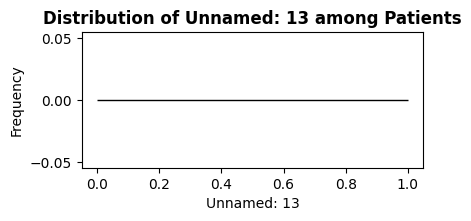

____________________________________________________________________________________________________


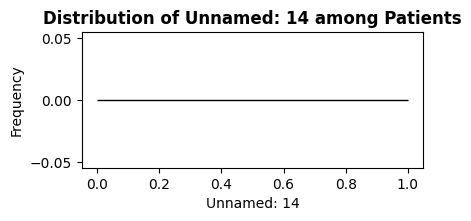

____________________________________________________________________________________________________


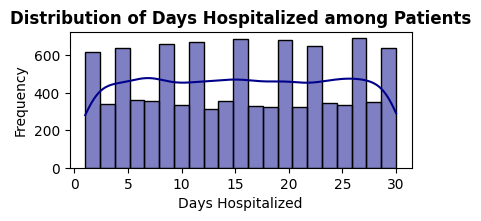

In [ ]:
#plotting histograms to find the frequency of numeric columns (age, billing amount and days hospitalized)
for col in healthcare.columns:
    if healthcare[col].dtype == 'int' or healthcare[col].dtype == 'float':
        plt.figure(figsize = (15,6))
        plt.style.use('seaborn-v0_8-dark-palette')
        plt.subplot(3,3,3)
        sns.histplot(healthcare[col],kde = True,color = 'darkblue')
        plt.ylabel('Frequency',fontsize = 10)
        plt.xlabel(col,fontsize = 10)
        plt.title(f'Distribution of {col} among Patients',fontsize = 12,weight = 'bold')
        print("_"*100)
        plt.show()

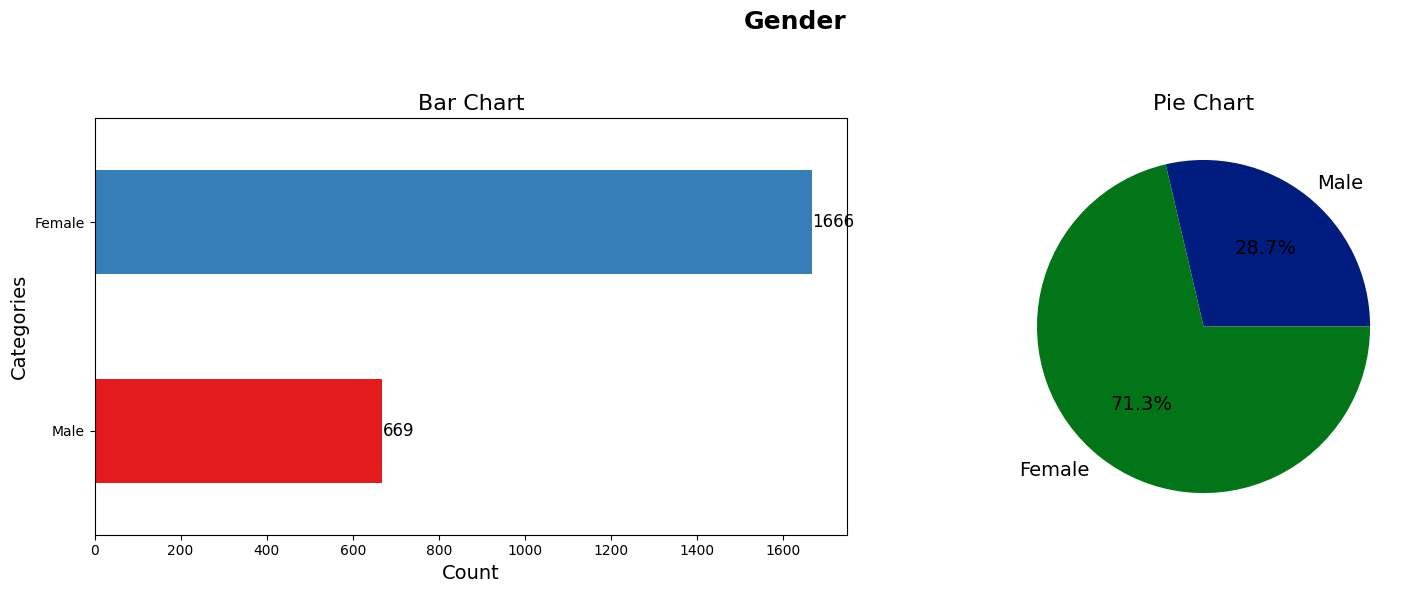

____________________________________________________________________________________________________




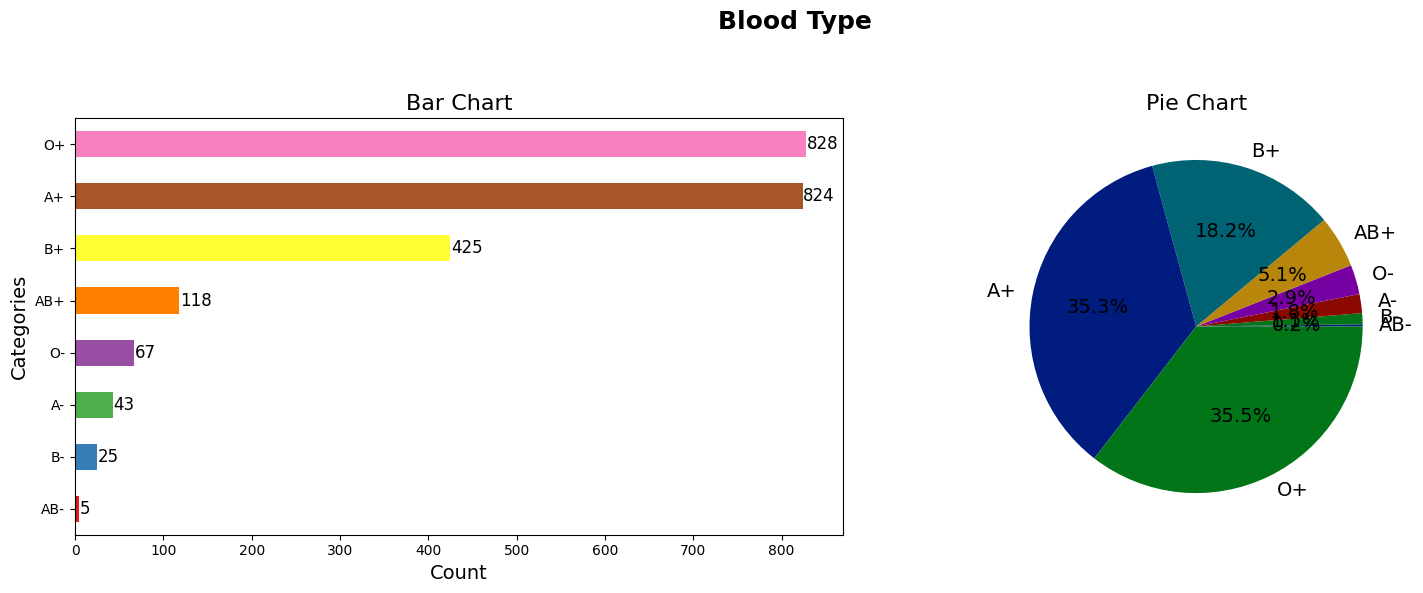

____________________________________________________________________________________________________




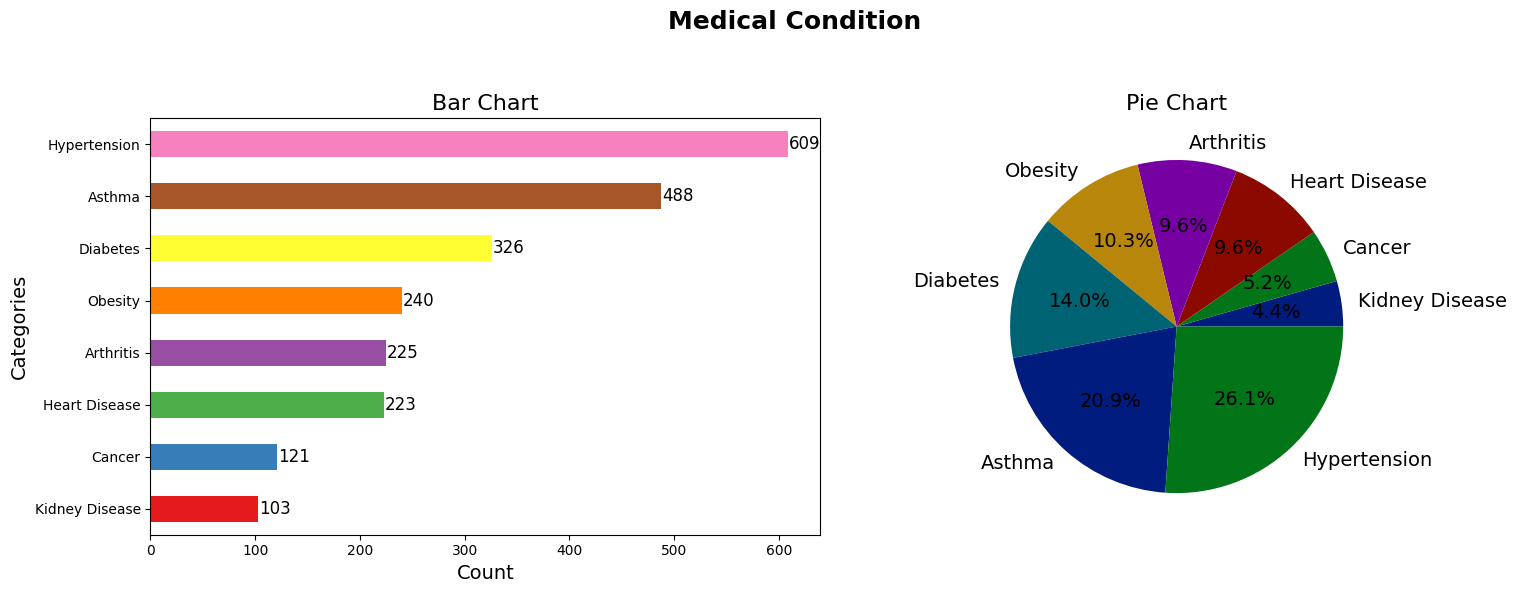

____________________________________________________________________________________________________




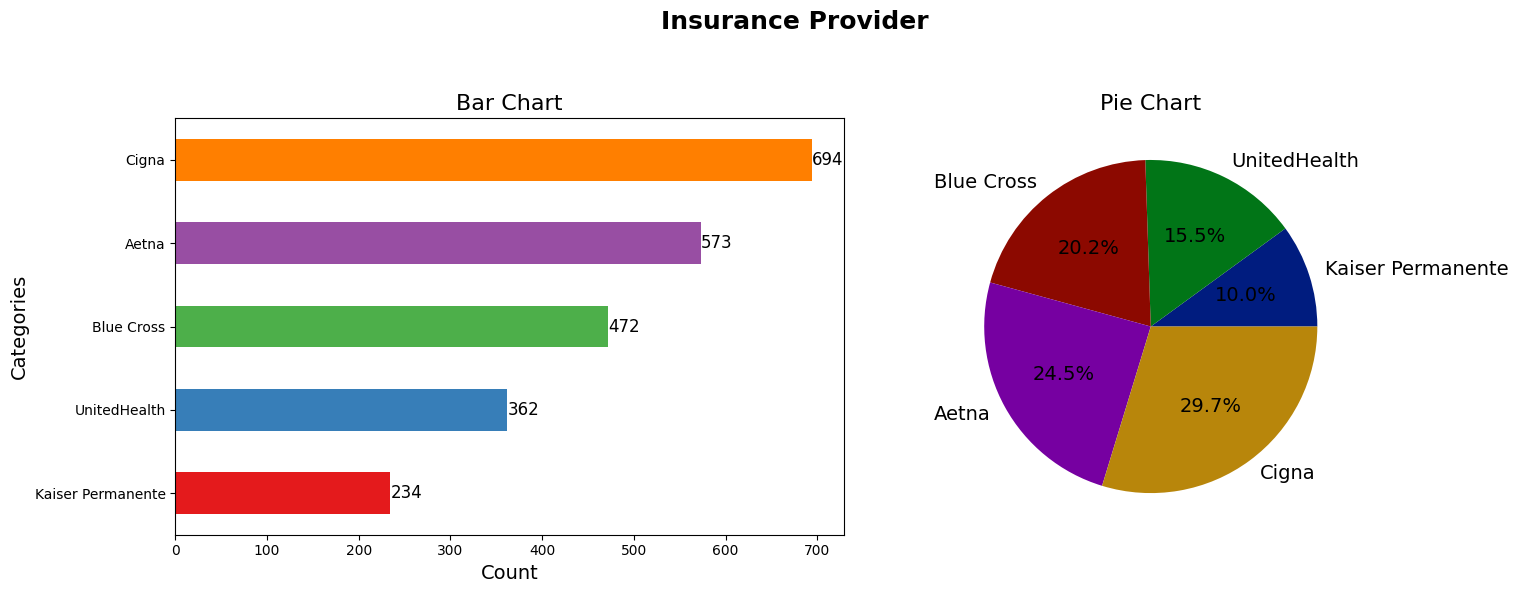

____________________________________________________________________________________________________




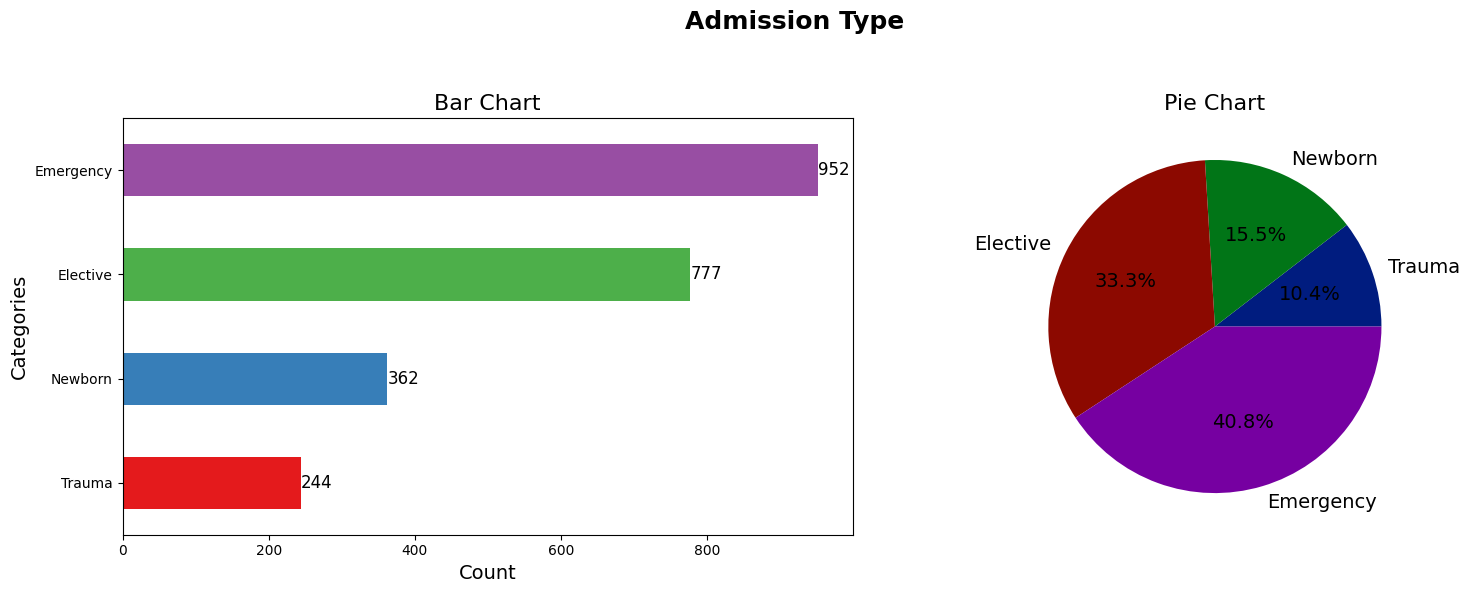

____________________________________________________________________________________________________




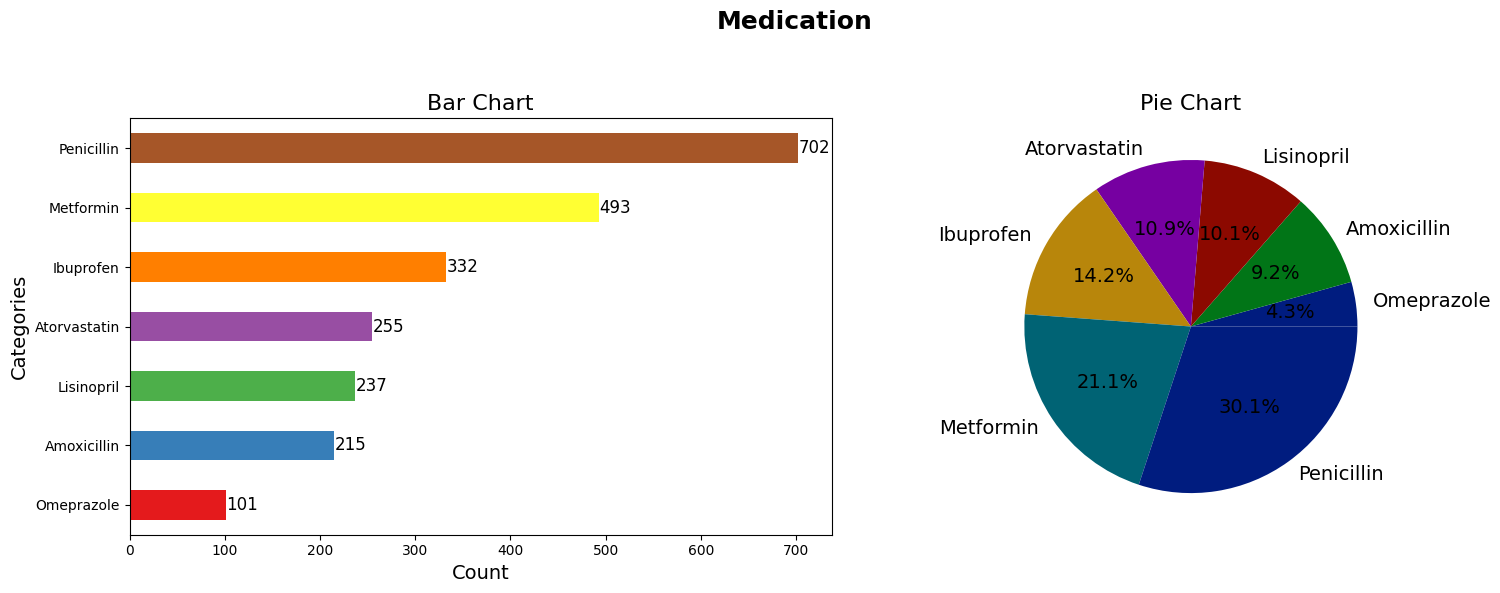

____________________________________________________________________________________________________




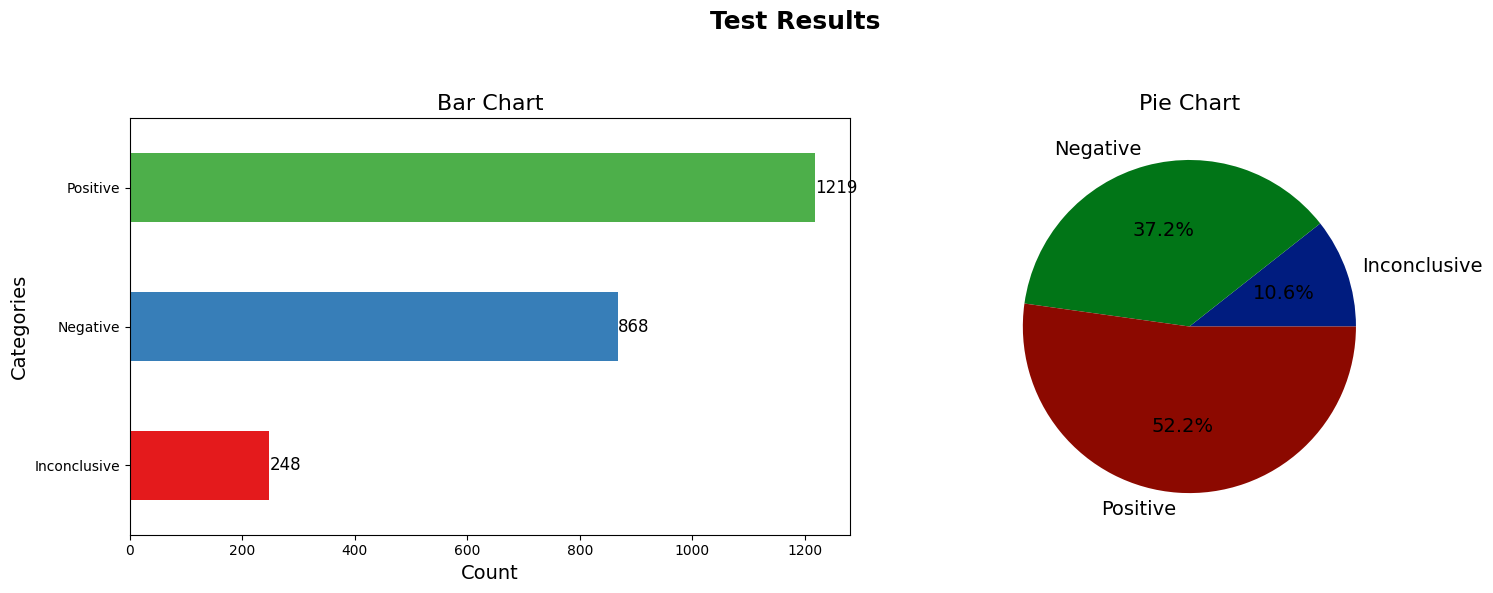

____________________________________________________________________________________________________


In [ ]:

# Loop through the columns to visualize data in categorical columns
for col in healthcare.columns:
    if healthcare[col].dtype == 'O' and col != 'Doctor' and col != 'Hospital':
        print('\n')
        fig, ax = plt.subplots(1, 2, figsize=(16, 6))
        fig.suptitle(col, fontsize=18, weight='bold')

        # Bar chart
        plt.subplot(1, 2, 1)
        category_count = healthcare[col].value_counts().sort_values()
        category_count.plot(kind='barh', color=plt.cm.Set1.colors)

        # Display values on the bars
        for index, value in enumerate(category_count):
            plt.text(value + 0.5, index, str(value), fontsize=12, va='center')

        plt.xlabel('Count', fontsize=14)
        plt.ylabel('Categories', fontsize=14)
        plt.title('Bar Chart', fontsize=16)

        # Pie chart
        plt.subplot(1, 2, 2)
        category_count.plot(
            kind='pie',
            labels=category_count.index,
            autopct='%1.1f%%',
            textprops={'fontsize': 14}
        )
        plt.ylabel('')
        plt.title('Pie Chart', fontsize=16)

        # Adjust layout
        plt.tight_layout(rect=[0, 0, 1, 0.93])
        plt.show()
        print("_" * 100)


**What is the distribution of medical condtions between genders?**

In [ ]:
#unstack function converts the data into 2 dimensional
gender_medical = healthcare.groupby(['Medical Condition','Gender']).size().sort_values().unstack()
gender_medical

Gender,Female,Male
Medical Condition,,
Arthritis,171,54
Asthma,337,151
Cancer,91,30
Diabetes,222,104
Heart Disease,161,62
Hypertension,440,169
Kidney Disease,75,28
Obesity,169,71


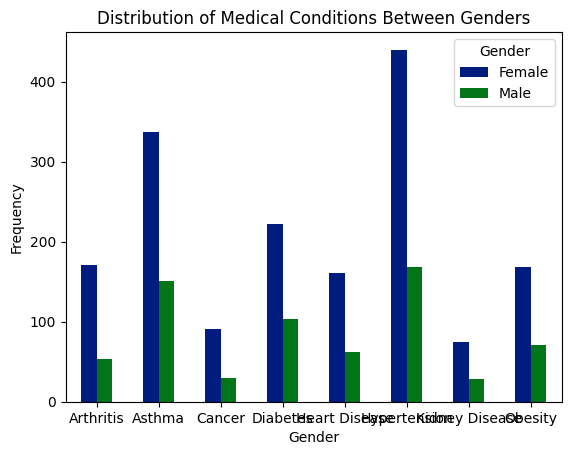

In [ ]:
gender_medical.plot(kind = 'bar')
plt.title('Distribution of Medical Conditions Between Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

***Interpretation***

Female have higher share in majority of the medical conditions. Cancer is leading medical condition among female whereas Hypertension is leading cause among male.

**What is the correlation between age,billing amount and days hospitalized**

In [ ]:
# selecting the columns to correlate
correlation_columns = ['Age','Billing Amount','Days Hospitalized']
# creating a df using the above columns
correlate_df = healthcare[correlation_columns]
#encoding categorical columns for correlation
correlate_df['Gender'] = healthcare['Gender'].astype('category').cat.codes
correlate_df['Admission Type'] = healthcare['Admission Type'].astype('category').cat.codes
correlate_df['Test Results'] = healthcare['Test Results'].astype('category').cat.codes
# creating correlation matrix
correlation_matrix = correlate_df.corr()
correlation_matrix

,Age,Billing Amount,Days Hospitalized,Gender,Admission Type,Test Results
Age,1.000000,-0.009483,0.009111,0.011965,0.010201,0.014458
Billing Amount,-0.009483,1.000000,-0.013507,0.000933,0.007690,0.000749
Days Hospitalized,0.009111,-0.013507,1.000000,0.003254,-0.000627,-0.007860
Gender,0.011965,0.000933,0.003254,1.000000,0.819033,0.884563
Admission Type,0.010201,0.007690,-0.000627,0.819033,1.000000,0.840322
Test Results,0.014458,0.000749,-0.007860,0.884563,0.840322,1.000000


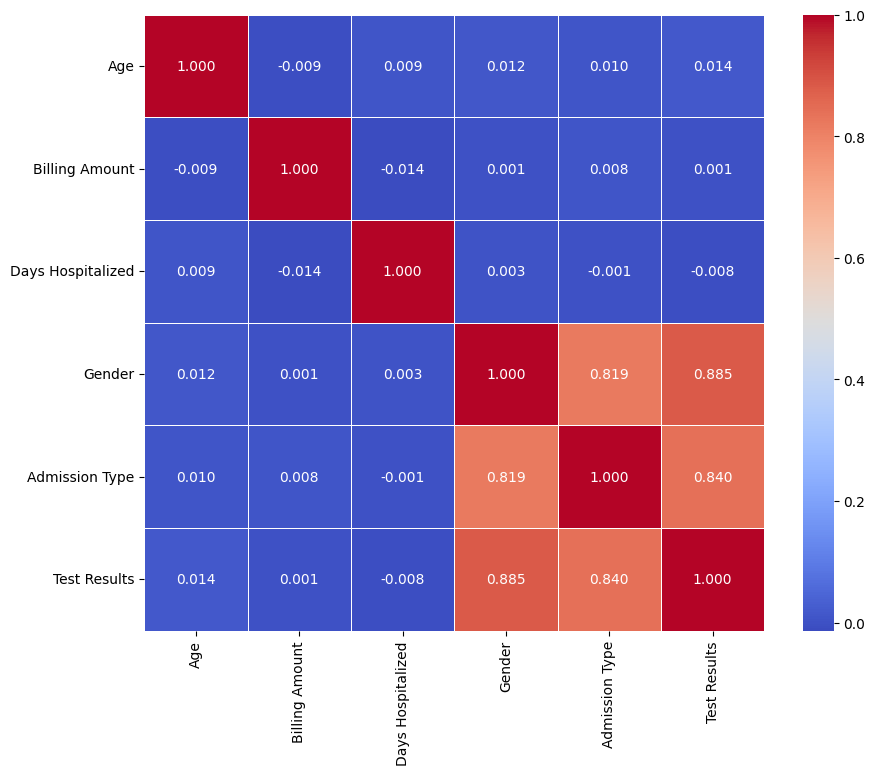

In [ ]:
#plotting correlation matrix using heatmap
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm',fmt = '.3f',linewidths = 0.5)
plt.show()

***Interpretation***

* There is a slight correlation between age and test results. Even there is a positive correlation between age and days hospitalized. There is a negative correlation between age and billing amount.
* Biling amount has negative correlation with test results and days hospitalized. Billing amount has a positive correlation with admission type and gender.
* Days hospitalized has negative correlation with every attribute except age.
* Except for billing amount attribute, gender has a negative correlation with all other attributes.
* Admission type and test results have a negative correlation.

**Which medical condition generated the highest average billing among male and female?**

In [ ]:
# Grouping data by medical condition and gender then calculating the mean of billing amount
medical_gender_billing = healthcare.groupby(['Medical Condition','Gender'])[['Billing Amount']].mean().reset_index()
medical_gender_billing

,Medical Condition,Gender,Billing Amount
0,Arthritis,Female,24270.166347
1,Arthritis,Male,23130.016303
2,Asthma,Female,25052.540036
3,Asthma,Male,26118.868821
4,Cancer,Female,23090.872995
5,Cancer,Male,24083.556677
6,Diabetes,Female,26743.271513
7,Diabetes,Male,24907.861276
8,Heart Disease,Female,26909.459212
9,Heart Disease,Male,24839.611215


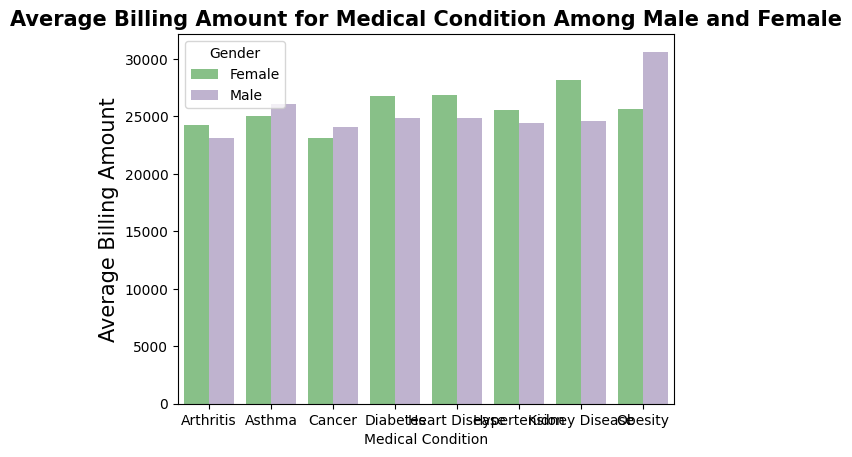

In [ ]:
# plot bar graph to find the average billing amount for medical condition among male and female
sns.barplot(x= medical_gender_billing['Medical Condition'],
            y= medical_gender_billing['Billing Amount'],
            hue = medical_gender_billing['Gender'],ci = None,
            palette="Accent")
# Adding labels and title
plt.ylabel('Average Billing Amount',fontsize = 15)
plt.title('Average Billing Amount for Medical Condition Among Male and Female',fontsize = 15, weight = 'bold')
plt.show()

**What is the distribution of different age groups?**

In [ ]:
min_age = healthcare['Age'].min()
max_age = healthcare['Age'].max()
print(min_age,",",max_age)

18 , 85


In [ ]:
healthcare['Age_Group'] = pd.cut(healthcare['Age'],bins = [18,30,40,50,60,70,80,float('inf')],
                                labels = ['18-30','31-40','41-50','51-60','61-70','71-80','Over 80'],
                                right = False)
Age_group = healthcare['Age_Group'].value_counts().sort_values(ascending = False)
Age_group

,count
Age_Group,
18-30,1774
71-80,1523
51-60,1521
31-40,1495
61-70,1467
41-50,1397
Over 80,823


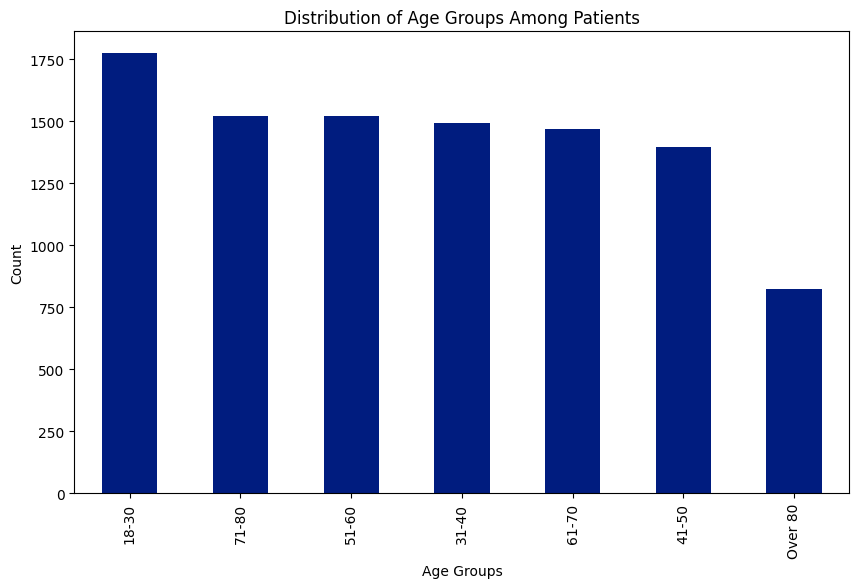

In [ ]:
plt.figure(figsize=(10,6))
Age_group.plot(kind = 'bar')
plt.title('Distribution of Age Groups Among Patients')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

***Interpretation***

The maximum number of patients are in the range of 18-30.

**CONCLUSION**

- Compared to male, there are high female patients.
- Most patients have the blood type of **O+**.
- Hypertension is the major medical condition among patients.
- Cigna is the leading insurance provider.
- Pencilin is the most prescribed medication.